In [2]:
import pandas as pd

file_path = "loan.csv"
df = pd.read_csv(file_path)

df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


(None,
     Loan_ID Gender Married Dependents     Education Self_Employed  \
 0  LP001002   Male      No          0      Graduate            No   
 1  LP001003   Male     Yes          1      Graduate            No   
 2  LP001005   Male     Yes          0      Graduate           Yes   
 3  LP001006   Male     Yes          0  Not Graduate            No   
 4  LP001008   Male      No          0      Graduate            No   
 
    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
 0             5849                0.0         NaN             360.0   
 1             4583             1508.0       128.0             360.0   
 2             3000                0.0        66.0             360.0   
 3             2583             2358.0       120.0             360.0   
 4             6000                0.0       141.0             360.0   
 
    Credit_History Property_Area Loan_Status  
 0             1.0         Urban           Y  
 1             1.0         Rural           

In [5]:
df.loc[:,'Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df.loc[:,'Married']=df['Married'].fillna(df['Married'].mode()[0])
df.loc[:,'Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df.loc[:,'Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
df.loc[:,'LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
df.loc[:,'Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
df.loc[:,'Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


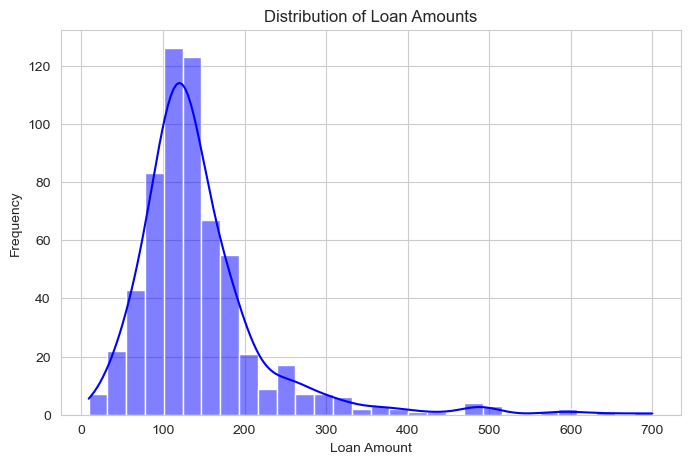

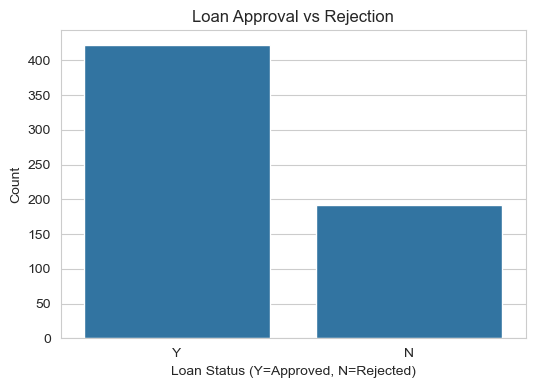

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.histplot(df['LoanAmount'],bins=30,kde=True,color="blue")
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Loan_Status",data=df)
plt.title("Loan Approval vs Rejection")
plt.xlabel("Loan Status (Y=Approved, N=Rejected)")
plt.ylabel("Count")
plt.show()

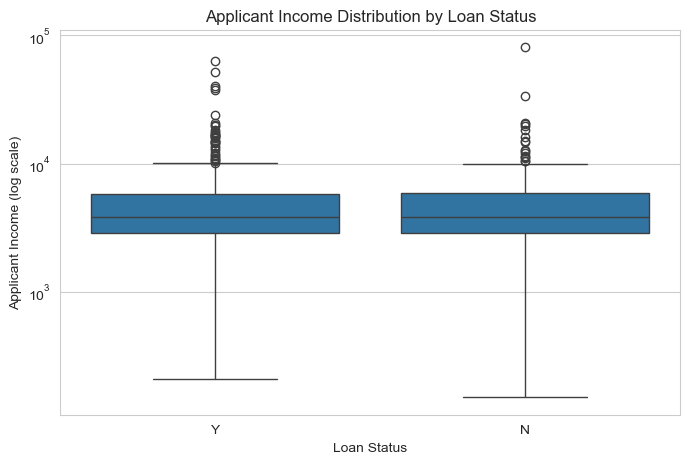

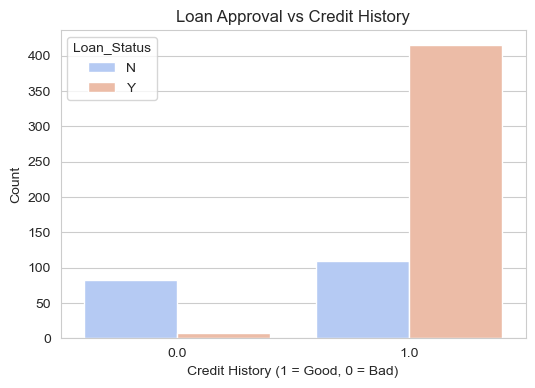

In [9]:

plt.figure(figsize=(8, 5))
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df, )
plt.yscale("log")  
plt.title("Applicant Income Distribution by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Applicant Income (log scale)")
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="Credit_History", hue="Loan_Status", data=df, palette="coolwarm")
plt.title("Loan Approval vs Credit History")
plt.xlabel("Credit History (1 = Good, 0 = Bad)")
plt.ylabel("Count")
plt.show()


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

df.drop(columns=["Loan_ID"], inplace=True)

categorical_cols = ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

X = df.drop(columns=["Loan_Status"])  
y = df["Loan_Status"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
154,1,0,0,0,0,3254,0.0,50.0,360.0,1.0,2
239,1,1,1,0,0,3315,0.0,96.0,360.0,1.0,1
448,1,1,2,0,0,3340,1710.0,150.0,360.0,0.0,0
471,1,1,1,1,0,2653,1500.0,113.0,180.0,0.0,0
273,1,1,0,0,0,2620,2223.0,150.0,360.0,1.0,1


In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

X_train["IsoForest_Score"] = iso_forest.fit_predict(X_train)
X_train["LOF_Score"] = lof.fit_predict(X_train)

iso_anomalies = (X_train["IsoForest_Score"] == -1).sum()
lof_anomalies = (X_train["LOF_Score"] == -1).sum()

iso_anomalies, lof_anomalies


(25, 25)

In [16]:
from sklearn.metrics import classification_report

y_pred_iso = (iso_forest.predict(X_test) == 1).astype(int)
y_pred_lof = (lof.fit_predict(X_test) == 1).astype(int)

report_iso = classification_report(y_test, y_pred_iso, target_names=["Rejected (0)", "Approved (1)"])
report_lof = classification_report(y_test, y_pred_lof, target_names=["Rejected (0)", "Approved (1)"])

report_iso,report_lof


('              precision    recall  f1-score   support\n\nRejected (0)       1.00      0.13      0.23        38\nApproved (1)       0.72      1.00      0.84        85\n\n    accuracy                           0.73       123\n   macro avg       0.86      0.57      0.53       123\nweighted avg       0.81      0.73      0.65       123\n',
 '              precision    recall  f1-score   support\n\nRejected (0)       0.57      0.11      0.18        38\nApproved (1)       0.71      0.96      0.82        85\n\n    accuracy                           0.70       123\n   macro avg       0.64      0.53      0.50       123\nweighted avg       0.67      0.70      0.62       123\n')

1. Isolation Forest Performance:
   
Accuracy: 73%
Precision (Fraudulent Loans - Rejected): 100% (Very high, meaning all flagged fraudulent loans are actually frauds)
Recall (Fraudulent Loans - Rejected): 13% (Very low, meaning many fraudulent loans go undetected)
F1-score (Fraudulent Loans - Rejected): 0.23 (Poor balance between precision and recall)
Approved Loan Precision: 72%
Approved Loan Recall: 100% (All approved loans were correctly classified)
Weighted Avg F1-score: 0.65

2. Local Outlier Factor (LOF) Performance:
   
Accuracy: 70%
Precision (Fraudulent Loans - Rejected): 57% (Lower than Isolation Forest)
Recall (Fraudulent Loans - Rejected): 11% (Even worse than Isolation Forest)
F1-score (Fraudulent Loans - Rejected): 0.18 (Poor balance between precision and recall)
Approved Loan Precision: 71%
Approved Loan Recall: 96%
Weighted Avg F1-score: 0.62